In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

DATAPATH = "data"

# Stars

from: https://www.kaggle.com/deepu1109/star-dataset

## Context

The purpose of making the dataset is to prove that the stars follows a certain graph in the celestial Space ,
specifically called Hertzsprung-Russell Diagram or simply HR-Diagram
so that we can classify stars by plotting its features based on that graph.

![image info](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3791628%2Ffe9436bf4e2d23b5b18fb3db1f1fcbcb%2FHRDiagram.png?generation=1597348809674507&alt=media)

## Attributes

Absolute Temperature (in K) <br>
Relative Luminosity (L/Lo)<br>
Relative Radius (R/Ro)<br>
Absolute Magnitude (Mv)<br>
Star Color (white,Red,Blue,Yellow,yellow-orange etc)<br>
Spectral Class (O,B,A,F,G,K,,M)<br>
Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**<br>
Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)<br>
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)<br>

The dataset is created based on several equations in astrophysics. They are given below:

Stefan-Boltzmann's law of Black body radiation (To find the luminosity of a star)<br>
Wienn's Displacement law (for finding surface temperature of a star using wavelength)<br>
Absolute magnitude relation<br>
Radius of a star using parallax .<br>

The dataset took 3 weeks to collect for 240 stars which are mostly collected from web.
The missing data were manually calculated using those equations of astrophysics given above.

## Questions

### 1) What is the star type based on the star properties?

In [23]:

stars = pd.read_csv(os.path.join(DATAPATH, "6 class csv.csv"))
stars.describe()



,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [24]:
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


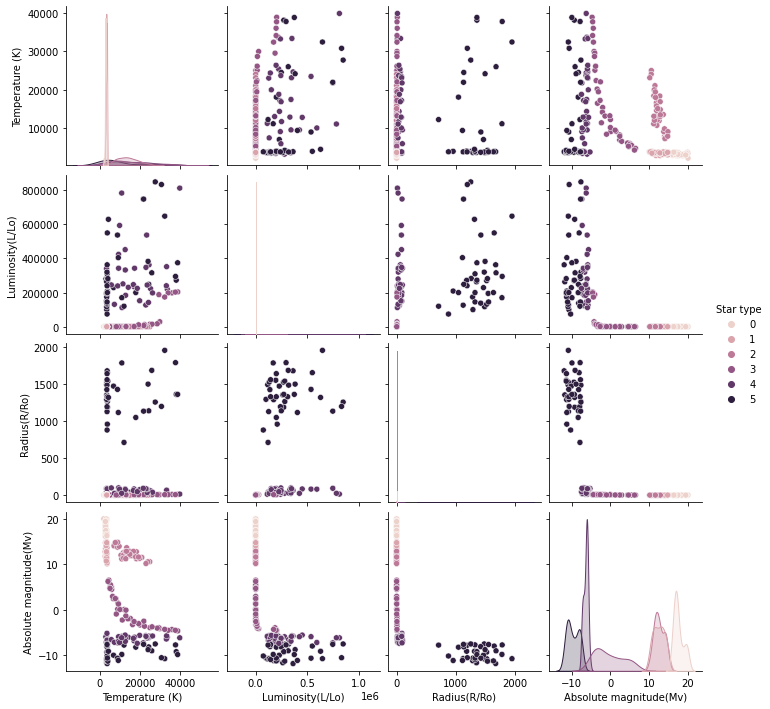

In [25]:
sns.pairplot(stars, hue="Star type")

Quick Decision tree to show that the boundaries are hard for classification and can be classified with very few rules easily which more or less match the HR-diagram as expected, though the HR diagram misses a few classes. 

In [5]:
X = stars.iloc[:, :4]
Y = stars.loc[:, "Star type"]
dct = DecisionTreeClassifier()
dct.fit(X, Y)
print(f"In sample accuracy achieved: {dct.score(X, Y)} with {dct.tree_.node_count - len(Y.unique())} rules")

In sample accuracy achieved: 1.0 with 5 rules


Quick and dirty GP approximation of 5 linear boundaries. Missing 5% probably for the single rule that is needed in one extra dimension. 

In [6]:
gpc = GaussianProcessClassifier(kernel=DotProduct() + DotProduct() + DotProduct() + DotProduct() + DotProduct())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gpc.fit(X_scaled, Y)
gpc.score(X_scaled, Y)

0.9583333333333334

[Text(279.0, 978.48, 'Absolute magnitude(Mv) <= -7.515\ngini = 0.833\nsamples = 240\nvalue = [40, 40, 40, 40, 40, 40]'),
 Text(139.5, 761.0400000000001, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 0, 0, 0, 40]'),
 Text(418.5, 761.0400000000001, 'Absolute magnitude(Mv) <= -4.97\ngini = 0.8\nsamples = 200\nvalue = [40, 40, 40, 40, 40, 0]'),
 Text(279.0, 543.6, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 0, 0, 40, 0]'),
 Text(558.0, 543.6, 'Temperature (K) <= 3884.5\ngini = 0.75\nsamples = 160\nvalue = [40, 40, 40, 40, 0, 0]'),
 Text(279.0, 326.1600000000001, 'Absolute magnitude(Mv) <= 15.495\ngini = 0.5\nsamples = 80\nvalue = [40, 40, 0, 0, 0, 0]'),
 Text(139.5, 108.72000000000003, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0, 0, 0]'),
 Text(418.5, 108.72000000000003, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0, 0, 0, 0]'),
 Text(837.0, 326.1600000000001, 'Radius(R/Ro) <= 0.405\ngini = 0.5\nsamples = 80\nvalue = [0, 0, 40, 40, 0, 0]'),
 Text(697.5, 108.72000000000003, 'gini = 0.0\nsample

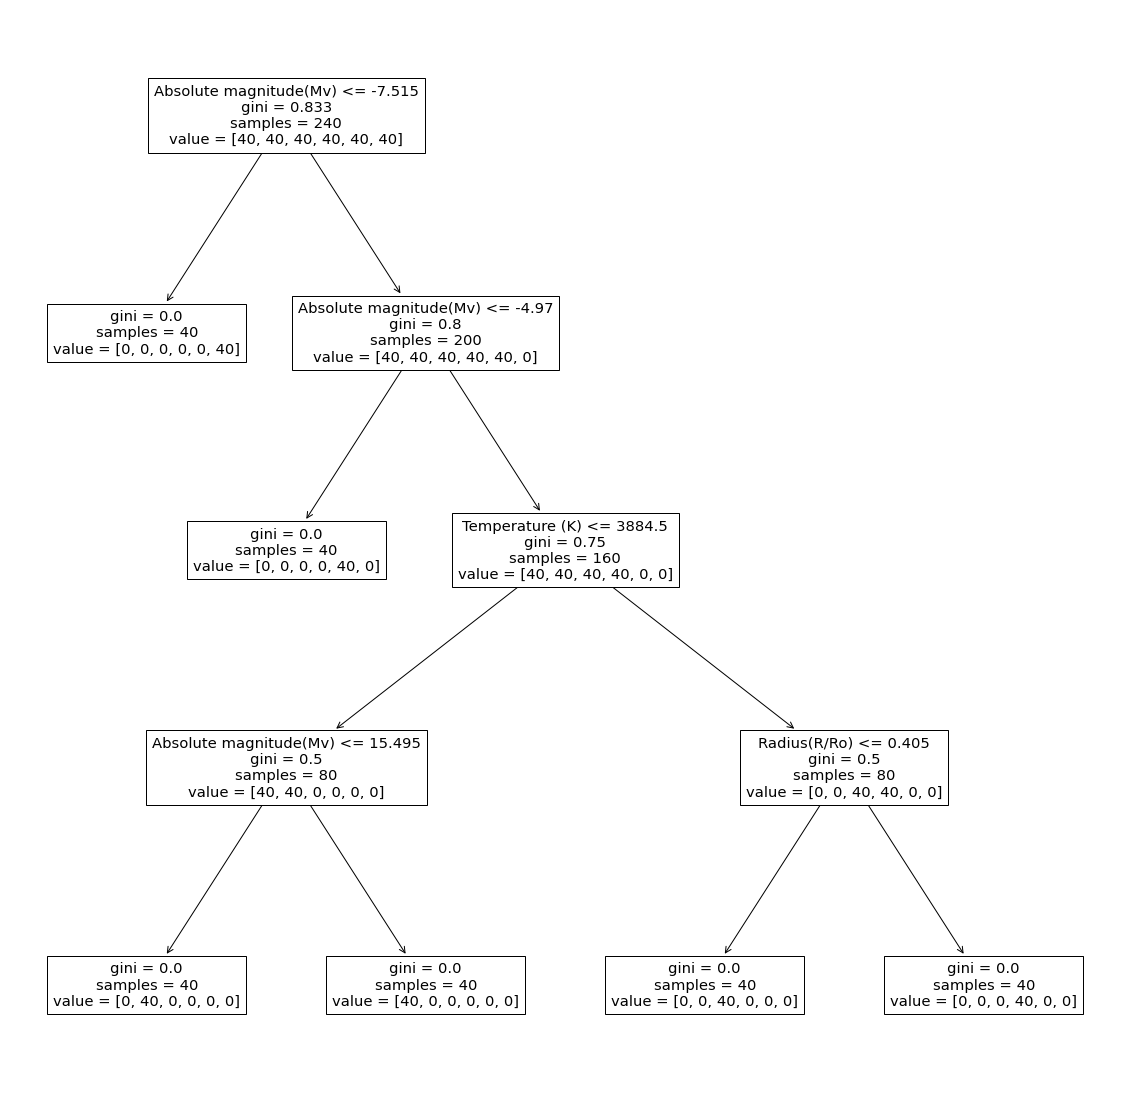

In [7]:

fig, ax = plt.subplots(figsize=(20,20))
plot_tree(dct, feature_names = X.columns, ax=ax)

# Teacher Styles

From: https://www.kaggle.com/soumyadiptadas/students-math-score-for-different-teaching-style

## Context

Assume you are the new superintendent of School District which has a Junior High School that consists of approximately 500 students in grades 7-8. Students are randomly assigned to grade-level, subject-specific classroom teachers. The school is diverse socioeconomically with several students qualifying for free or reduced-price meals. The ethnic composition of the school is relatively diverse consisting primarily of African-American, Hispanic, Asian, and Caucasian students.

There are three teachers who teach 8th-grade math at the school, each doing their own thing when it comes to teaching math. Ms. Ruger, a young African-American lady who is certified to teach science and math, has been teaching for a total of 5 years and has taught math for the past 3 years. Ms. Smith, a Caucasian lady in her 40s who is certified to teach Spanish and math, has taught Spanish for 12 years but has taught math for the past 3 years. Ms. Wesson, an older Caucasian lady and the sister of the school board president, has been teaching PE for 24 years and has been assigned to teach math for the past 3 years. Each teacher was allowed to use their preferred teaching method and to select their own textbook three years ago. All three use different textbooks.

Ms. Wesson’s approach to teaching math would be broadly defined as the traditional method. The traditional math teacher adheres to a top-down approach in which knowledge originates from the teacher and is disseminated to the students. The teacher is recognized by the students (and often by the teacher herself) as the authority on the subject matter. Traditional math teachers tend to thrive on structure and order, resulting in quiet, calm learning environments. There is research that indicates certain behavioral issues are minimized in a traditional classroom resulting in effective, direct instruction.

Ms. Ruger and Ms. Smith’s approach to teaching math would be more broadly defined as the standards-based method. The standards-based math teacher adheres to a literal interpretation of well-written standards. The teacher facilitates the learning in a constructivist environment in which students develop, explore, conjecture and test their conjectures within the confines of the standard. The teacher believes there is research that a majority of children learn more and deeper mathematics and are better problem solvers when in the standards-based classroom.

During a meeting with the math department it was suggested that the three 8th-grade math teachers should be using the same teaching method and the same textbook. Ms. Wesson, being quite vocal, feels strongly that her approach is the better of the two because of the ethnic composition and sociological background of the students. She further believes and proposes that the students should be grouped among the three teachers according to the students’ ethnicity. She suggests that Ms. Ruger who is African-American teach the majority of the African-American students and that she, Ms. Wesson, would primarily teach the Caucasian and Asian students. Ms. Smith, who speaks fluent Spanish, would teach the majority of the Hispanic students. She also proposes that students be grouped within each teacher’s class by their ability with the high-ability students in a group by themselves and the lower-ability students in a group by themselves because she believes, based on a “gut” feeling, that the students will perform better if they are segregated into groups within the classroom. To support her argument she provides a copy of an article she located in the ATU library (see the Ross article entitled “Math and Reading Instruction in Tracked First-Grade Classes”) to each member of the department. She mentions that she has discussed this with her brother, the school board president, and that it will probably be discussed at the next board meeting. She further states that math is math and teachers should be allowed to teach using the style in which they are most comfortable.

Ms. Smith does not agree with Ms. Wesson’s proposal and shares an article that she has read (see the Thompson article about standards-based math). She states that research indicates students in traditional programs may have better procedural skills, but definitely lack in problem-solving creativity. She proposes that all three teachers should be using the standards-based approach to teaching.

Knowing that you have less than 30 days before the next board meeting you know that you need to have a proposal prepared based on school performance data.  You have access to the latest student standardized math scores and personal data for the students taught by the 3 teachers (see file named 1_Research_Project_Data).   In order to protect confidentially, student names have been replaced by numbers.  You try to anticipate and list any question that might be raised about student performance. 
The next day you receive a call from the school board president regarding the two teaching methods used by the teachers. The president asks you to prepare a white paper that he can disseminate at the board meeting. The president wants you to present your recommendation at the board meeting for a specific teaching method – standards-based or traditional – based on your analysis of the 8th grade test scores.

## Attributes

Student <br>
Teacher <br>
Gender <br>
Ethnicity <br>
Lunch subsidy <br>
Score <br>
Teaching style <br>

## Questions

### 1) Which teaching styles should the teachers adopt? 
### 2) Should students be segregated into separate classrooms by ethnicity? 
### 3) Should students be segregated into separate gender schools?

In [10]:
teachers = pd.read_spss(os.path.join(DATAPATH, "1ResearchProjectData.sav"))
teachers.describe()

,Student,Score
count,216.000,216.000000
mean,108.500,65.273148
std,62.498,16.361453
min,1.000,30.000000
25%,54.750,53.000000
50%,108.500,65.000000
75%,162.250,79.000000
max,216.000,95.000000


In [11]:
teachers.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


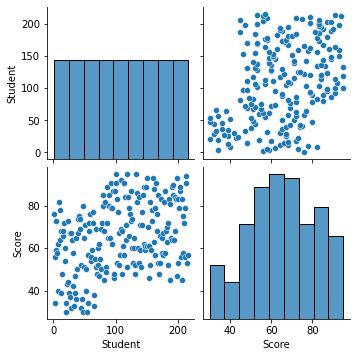

In [12]:
sns.pairplot(teachers)

# Human Stress Detection

From: https://www.kaggle.com/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv

## Context

Considering today’s lifestyle, people just sleep forgetting the benefits sleep provides to the human body. Smart-Yoga Pillow (SaYoPillow) is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. An edge processor with a model analyzing the physiological changes that occur during sleep along with the sleeping habits is proposed. Based on these changes during sleep, stress prediction for the following day is proposed. The secure transfer of the analyzed stress data along with the average physiological changes to the IoT cloud for storage is implemented. A secure transfer of any data from the cloud to any third-party applications is also proposed. A user interface is provided allowing the user to control the data accessibility and visibility. SaYoPillow is novel, with security features as well as consideration of sleeping habits for stress reduction, with an accuracy of up to 96%.

## Attributes

In SayoPillow.csv, you will see the relationship between the parameters: <br>
snoring range of the user, <br>
respiration rate, <br>
body temperature, <br>
limb movement rate, <br>
blood oxygen levels, <br>
eye movement, <br>
number of hours of sleep, <br>
heart rate and <br>
Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) that has been generated from Literature Review. (No human subjects were considered) 

## Questions

### 1) What relationship might htere be between hours of sleep and stress levels
### 2) What can you say about next day stress levels given how you sleep?
### 3) How accurate is the 96% confidence claim of SaYo?

In [2]:
stress = pd.read_csv(os.path.join(DATAPATH, "SaYoPillow.csv"))
stress.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [3]:
stress.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


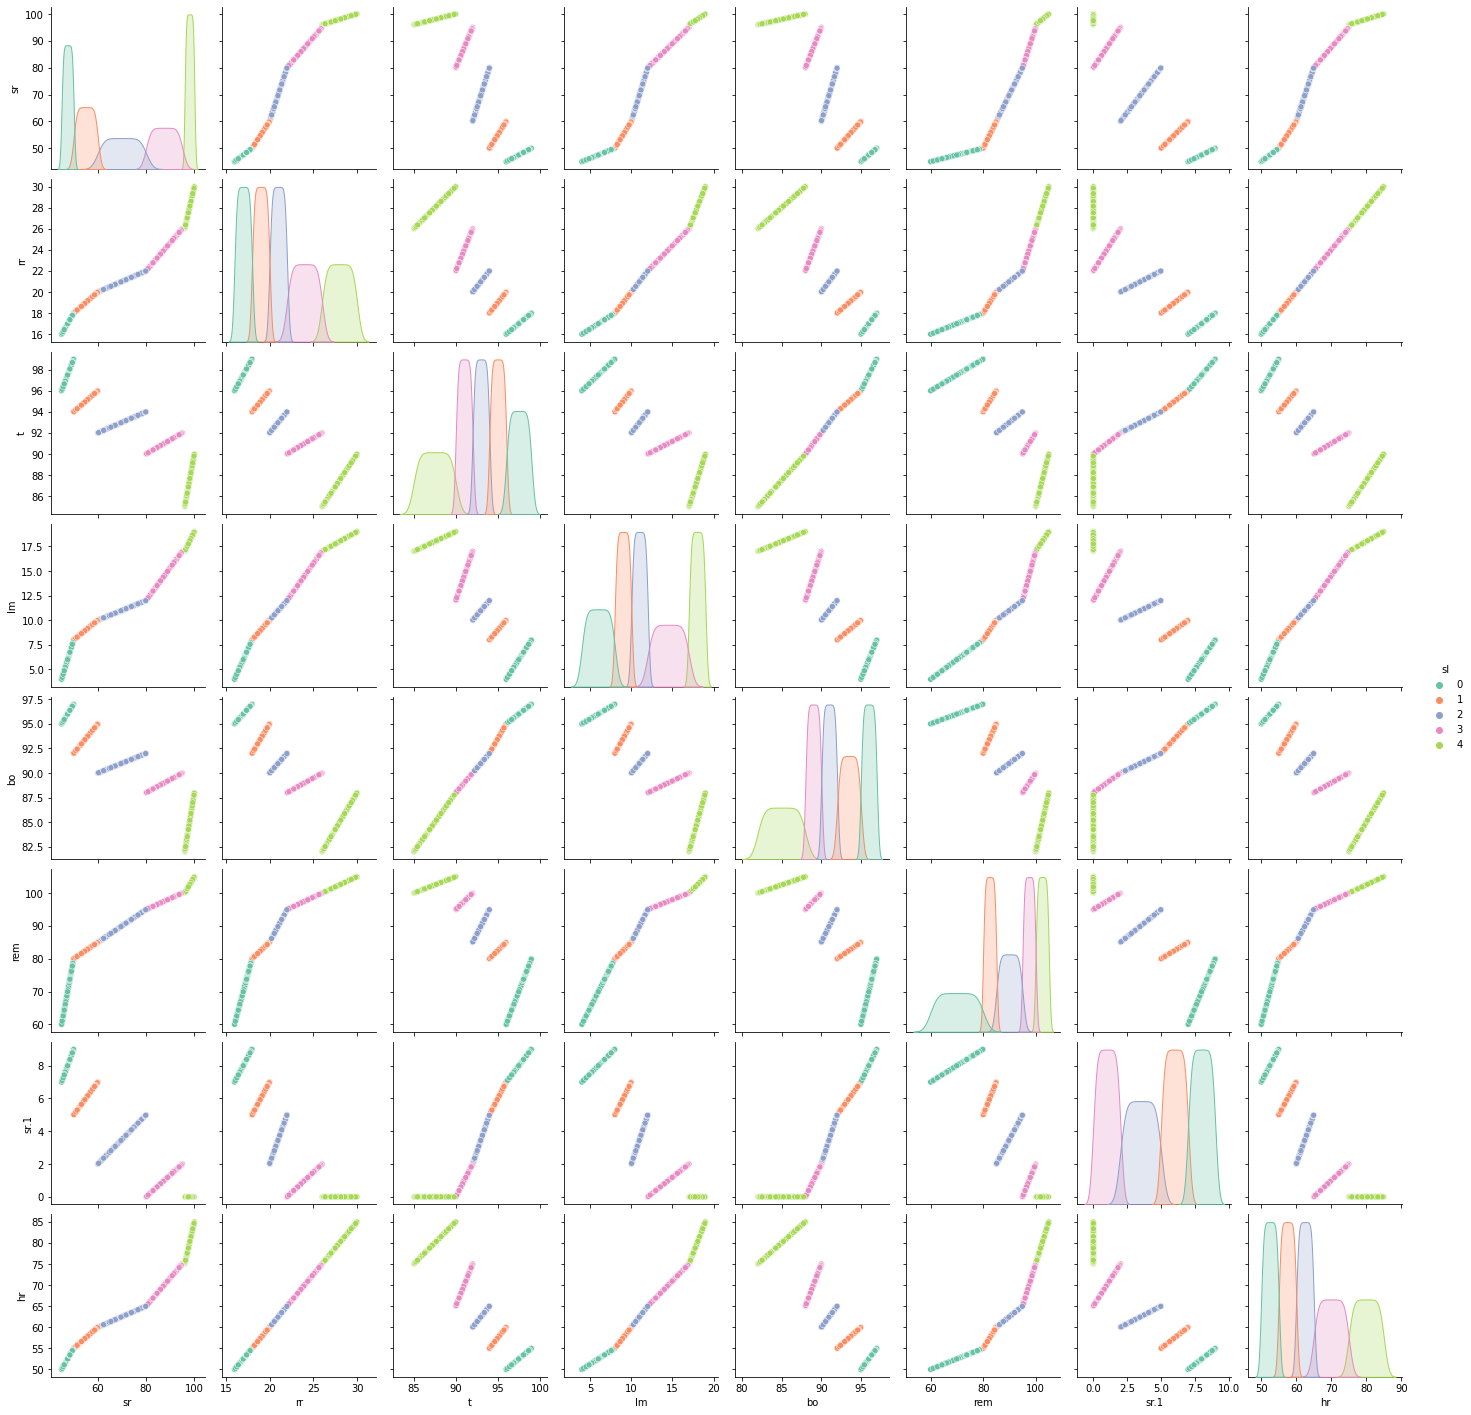

In [13]:
sns.pairplot(stress, hue="sl", palette="Set2")

# Heart Failure

from: https://www.kaggle.com/fedesoriano/heart-failure-prediction

## Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information
Age: age of the patient [years] <br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal]<br>

## Questions

### What can we say about depression and heart disease?
### What are risk factors for heart disease?

In [14]:
heart = pd.read_csv(os.path.join(DATAPATH, "heart.csv"))
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


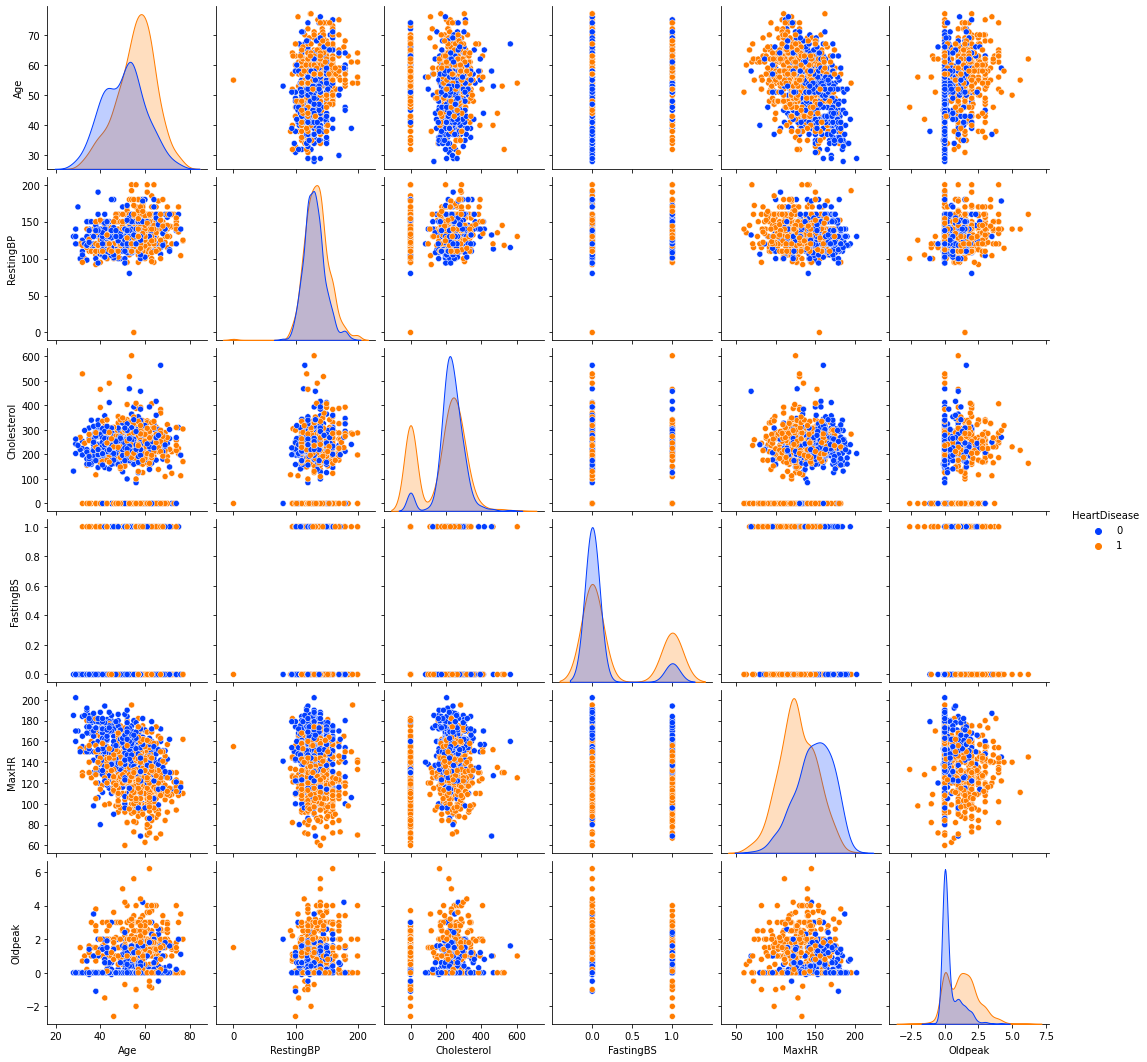

In [16]:
sns.pairplot(heart, hue="HeartDisease", palette="bright")

# Strokes

from: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Questions

### 1) Do certain socioeconomic fators represent risk factors for stroke: Marriage, work type, residence type?
### 2) Do certain medical factors affect stroke risk?
### 3) Does smoking affect strokes?

In [17]:
stroke = pd.read_csv(os.path.join(DATAPATH, "healthcare-dataset-stroke-data.csv"))
stroke.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


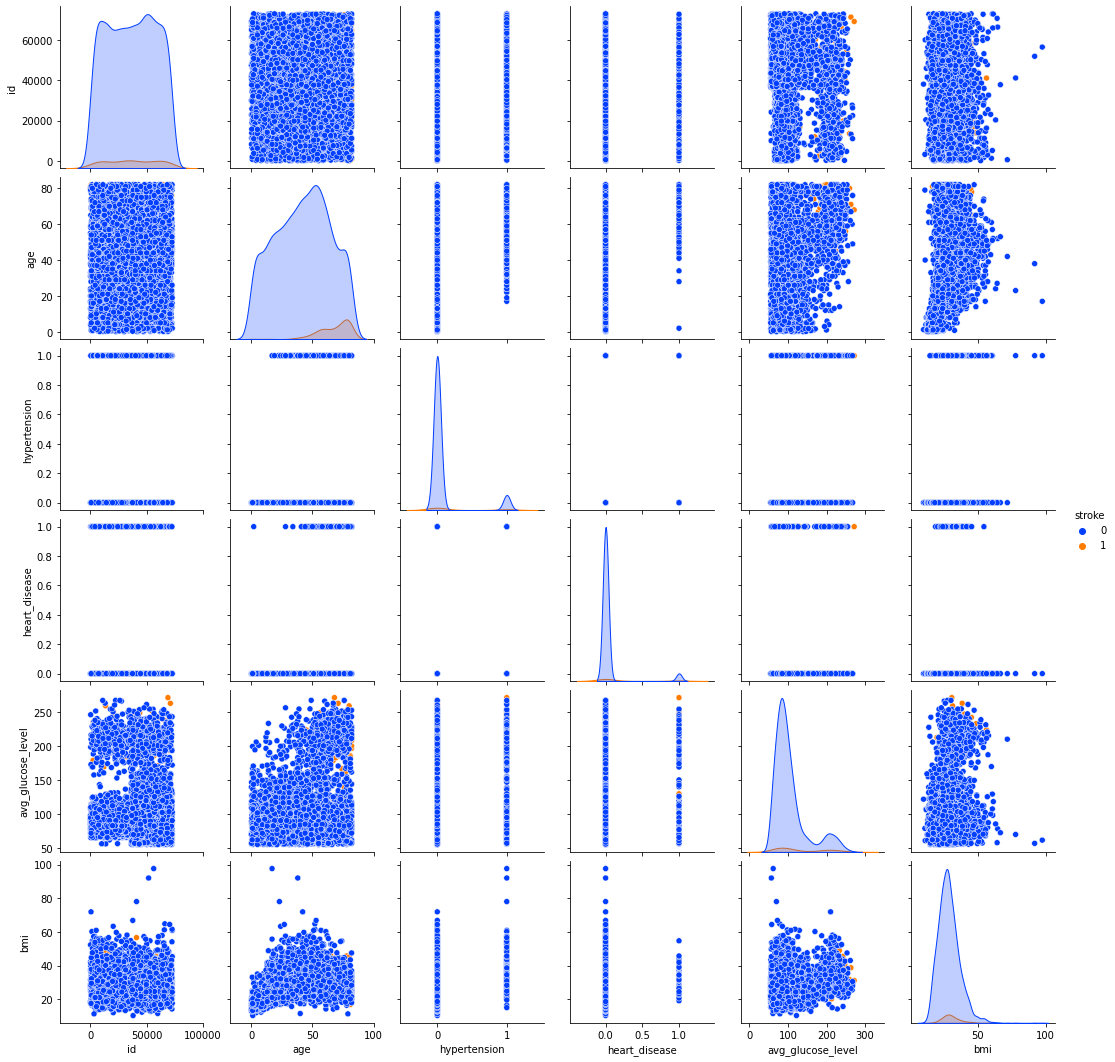

In [20]:
sns.pairplot(stroke, hue="stroke", palette="bright")

# Rain in Brazil

from: https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region/version/8?select=north.csv

## Context
It's covers hourly weather data from 623 inmet weathers stations of Brazil. 

## Attribute Information

    Date (YYYY-MM-DD)
    Time (HH:00)
    Amount of precipitation in millimetres (last hour)
    Atmospheric pressure at station level (mb)
    Maximum air pressure for the last hour (mb)
    Minimum air pressure for the last hour (mb)
    Solar radiation (KJ/m2)
    Air temperature (instant) (°c)
    Dew point temperature (instant) (°c)
    Maximum temperature for the last hour (°c)
    Minimum temperature for the last hour (°c)
    Maximum dew point temperature for the last hour (°c)
    Minimum dew point temperature for the last hour (°c)
    Maximum relative humid temperature for the last hour (%)
    Minimum relative humid temperature for the last hour (%)
    Relative humid (% instant)
    Wind direction (radius degrees (0-360))
    Wind gust in metres per second
    Wind speed in metres per second
    Brazilian geopolitical regions
    State (Province)
    Station Name (usually city location or nickname)
    Station code (INMET number)
    Latitude
    Longitude
    Elevation

## Questions

### 1) Can we forecast temperature or precipitation?

In [16]:
brazil = pd.read_csv(os.path.join(DATAPATH, "parsed_brazil.csv"))
brazil.describe()

,index,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",latitude,longitude,height
count,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,...,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06
mean,1.728984e+05,-2.368686e+03,-1.091195e+03,-1.099674e+03,-1.100162e+03,-4.753662e+03,-1.826682e+03,-2.016026e+03,-1.834738e+03,-1.835557e+03,...,-2.027631e+03,-1.971403e+03,-1.980950e+03,-1.972319e+03,-2.082307e+03,-2.154196e+03,-2.141020e+03,-5.747661e+00,-5.533825e+01,-1.685074e+02
std,1.167873e+05,4.251535e+03,4.308733e+03,4.315761e+03,4.315489e+03,5.871869e+03,3.891501e+03,4.032835e+03,3.898670e+03,3.898081e+03,...,4.040888e+03,4.057146e+03,4.058819e+03,4.055221e+03,4.207228e+03,4.114295e+03,4.102944e+03,3.982830e+00,7.705193e+00,1.812283e+03
min,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,...,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-1.275056e+01,-7.278667e+01,-9.999000e+03
25%,6.913500e+04,0.000000e+00,9.744000e+02,9.745000e+02,9.738000e+02,-9.999000e+03,2.210000e+01,1.490000e+01,2.240000e+01,2.180000e+01,...,1.410000e+01,4.600000e+01,3.900000e+01,4.200000e+01,1.300000e+01,0.000000e+00,0.000000e+00,-8.968611e+00,-6.062833e+01,5.500000e+01
50%,1.593680e+05,0.000000e+00,9.915000e+02,9.917000e+02,9.911000e+02,-9.999000e+03,2.470000e+01,2.160000e+01,2.510000e+01,2.430000e+01,...,2.110000e+01,7.800000e+01,7.000000e+01,7.400000e+01,8.900000e+01,2.200000e+00,6.000000e-01,-5.365833e+00,-5.186250e+01,1.110000e+02
75%,2.688480e+05,0.000000e+00,1.004000e+03,1.004300e+03,1.003700e+03,9.530000e+02,2.810000e+01,2.290000e+01,2.900000e+01,2.730000e+01,...,2.250000e+01,9.100000e+01,8.800000e+01,9.000000e+01,2.030000e+02,4.500000e+00,1.700000e+00,-2.640556e+00,-4.847861e+01,2.200000e+02
max,4.203920e+05,9.720000e+01,1.050000e+03,1.049800e+03,1.050000e+03,4.530500e+04,4.220000e+01,4.350000e+01,4.500000e+01,4.500000e+01,...,3.980000e+01,1.000000e+02,1.000000e+02,1.000000e+02,3.600000e+02,9.970000e+01,1.990000e+01,4.477500e+00,-4.592000e+01,7.980000e+02


In [17]:
brazil.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


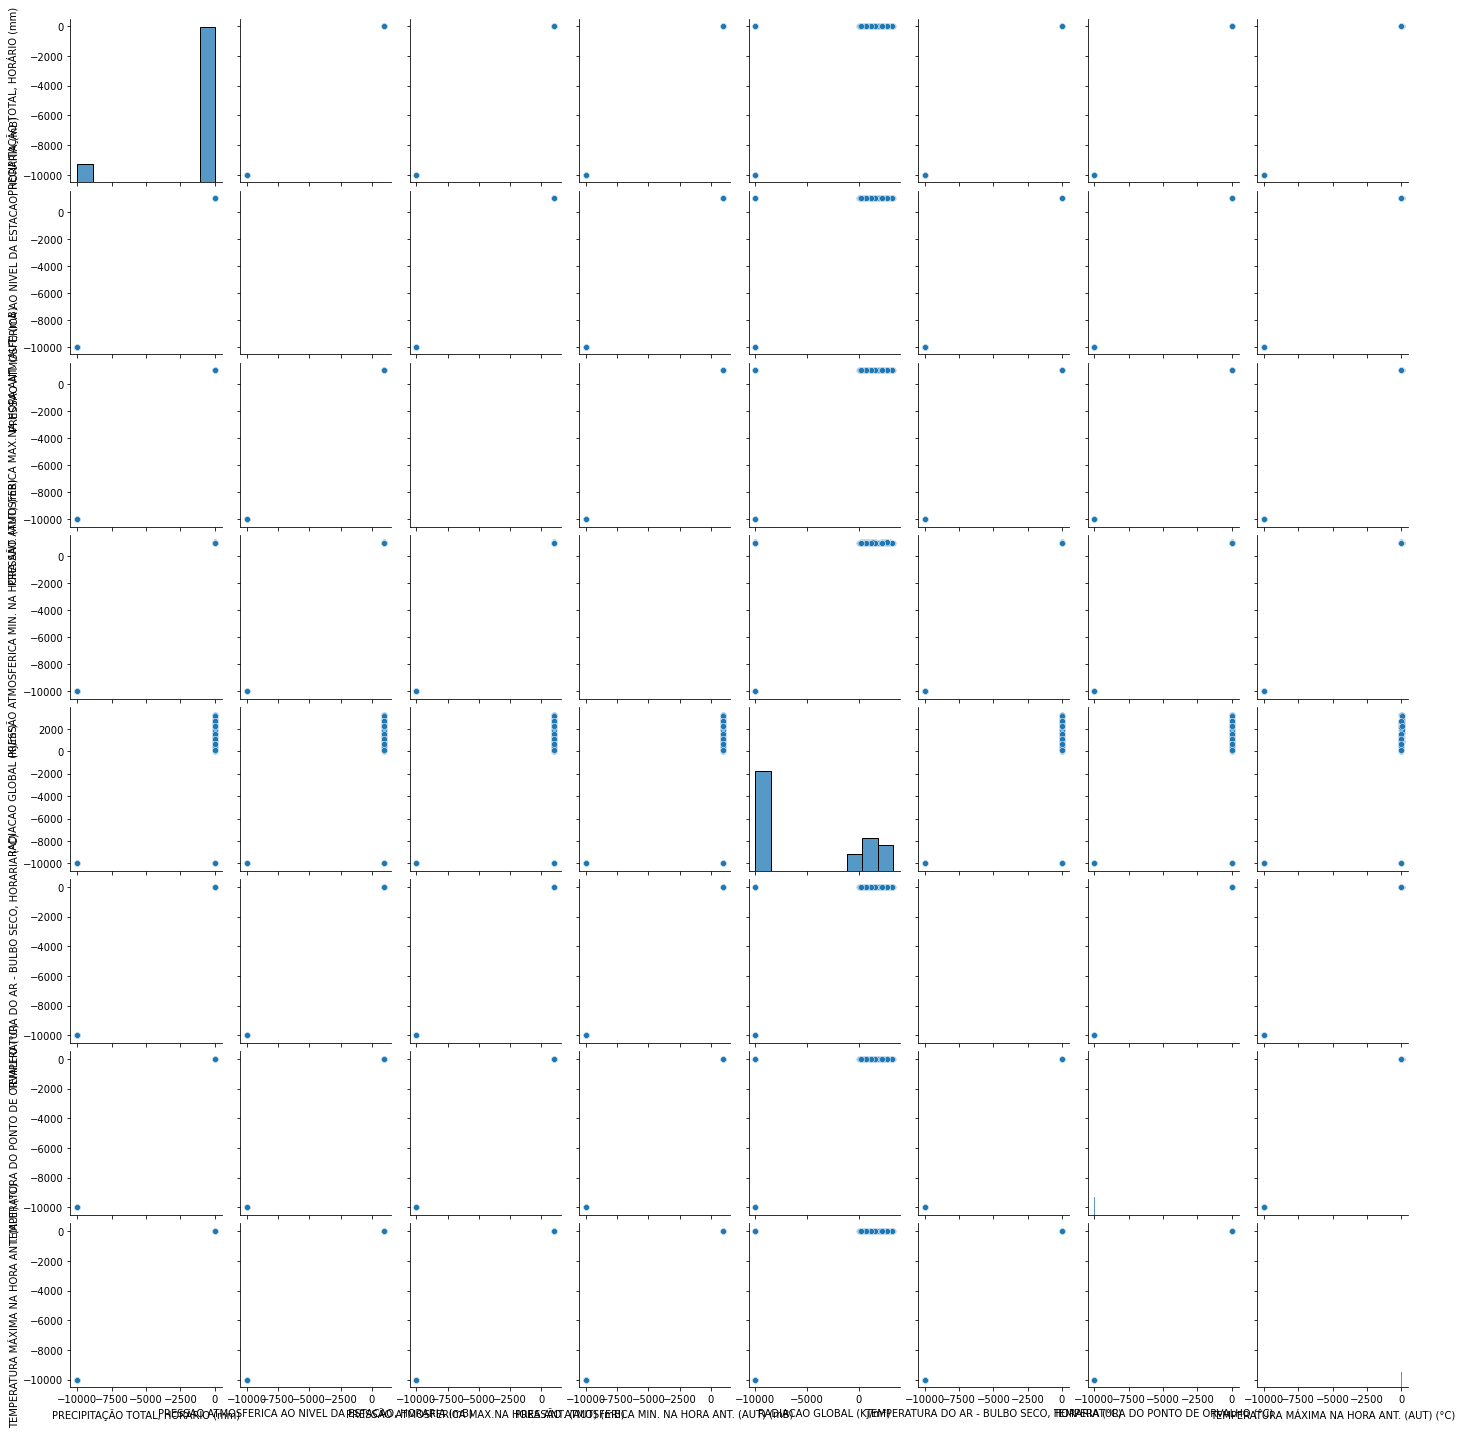

In [26]:
sns.pairplot(brazil.iloc[:200,2:11])

In [31]:
brazil.iloc[:1000,10].value_counts()

-9999.0    125
 25.1       21
 25.3       20
 25.6       20
 24.2       19
          ... 
 23.0        2
 32.4        2
 22.6        1
 32.9        1
 32.5        1
Name: TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C), Length: 100, dtype: int64